In [2]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [3]:
%matplotlib inline
import matplotlib
from pylab import *
import numpy as np
from scipy.optimize import curve_fit

pass

In [4]:
# Define some plotting styles that we will use.
fontSize=15
matplotlib.rcParams.update({"axes.formatter.limits": (-4,4),'font.family':'Avenir','font.size': fontSize, "axes.titlesize": fontSize, "xtick.labelsize": fontSize, "ytick.labelsize": fontSize,})
plotStyles={"markersize":12,"markeredgewidth":2.0,"linewidth":2.0}
stepStyles={"markersize":15,"markeredgewidth":3.0,"linewidth":4.0,"where":"post"}
scatterStyles={"linewidth":1.0}
barStyles={"width":0.75, "linewidth":0, "align":"center"}

## manual analysis
### data

In [5]:
def gaussian(x, mu, sig):
    return np.exp(-np.power(x - mu, 2.) / (2 * np.power(sig, 2.)))/(np.sqrt(2*np.pi)*sig)

def mixed_model(x, a, sig):
    return a*gaussian(x, 2, sig) + (1-a)*gaussian(x, 4, sig)

def hist(X):
    (bins,edges) = np.histogram(X,np.arange(-0.5*1,np.max(X)+1.5*1,1))
    centers = (edges[:-1]+edges[1:])/2
    xdata=centers;ydata=bins/sum(bins)
    pdf = np.zeros((len(bins),2),dtype=float)
    pdf[:,0]=centers
    pdf[:,1] = bins.astype(double)/(np.sum(bins)*(centers[1]-centers[0]))

    popt, pcov = curve_fit(mixed_model, xdata, ydata, p0=[0.5,1])
    return pdf, popt
        
spot_number = np.loadtxt('data_week2_count.txt',delimiter='   ')

### theoretical value

In [6]:
C = 41; 
D = 30; 
tau = 35; 
m = 1.51/2.32;

x_ave = np.power(2, (C*(1-m)+D)/tau)
print(x_ave)

b = (4-x_ave)/2
x_std = np.sqrt(b*(2-x_ave)**2 + (1-b)*(4-x_ave)**2)
print(x_std)

2.4051602240817074
0.8038442890171426


### plot

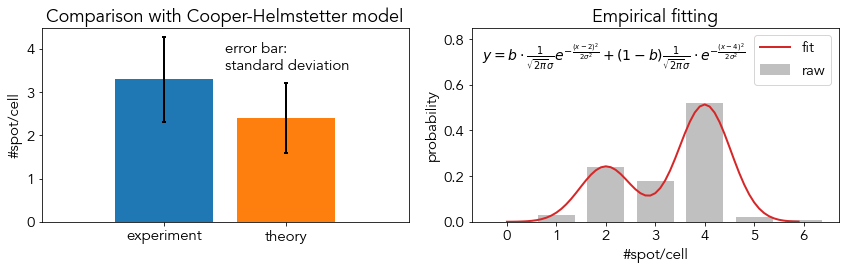

In [7]:
plt.figure(figsize=(12,4))
subplot(1,2,1)
plt.bar(1,np.mean(spot_number),yerr=np.std(spot_number),error_kw=dict(lw=2, capsize=2, capthick=2),color='tab:blue')
plt.bar(2, x_ave, yerr = x_std, error_kw=dict(lw=2, capsize=2, capthick=2), color='tab:orange')
plt.xticks([1,2], ['experiment','theory'],rotation=0)
plt.xlim((0,3))
plt.ylabel('#spot/cell')
plt.title('Comparison with Cooper-Helmstetter model',fontsize=18)
plt.text(1.5,3.5,'error bar: \nstandard deviation')

subplot(1,2,2)
(pdf, popt) = hist(spot_number); 
plt.bar(pdf[:,0],pdf[:,1], color='silver',label='raw', **barStyles)
plt.plot(np.arange(0,6,0.1),mixed_model(np.arange(0,6,0.1),*popt),color='tab:red',label='fit', **plotStyles)
plt.legend(loc='upper right')
plt.ylabel('probability')
plt.xlabel('#spot/cell')
plt.title('Empirical fitting',fontsize=18)
plt.text(-0.5,0.7,r'$y=b\cdot \frac{1}{\sqrt{2\pi}\sigma}e^{-\frac{(x-2)^2}{2\sigma^2}} + (1-b)\frac{1}{\sqrt{2\pi}\sigma} \cdot e^{-\frac{(x-4)^2}{2\sigma^2}}$',fontsize=14)
plt.ylim(0,0.85)
tight_layout()